**Name: Mozammal Hossain\
Registration Number: 2017331015**

# **Task #01 : Simulation of analog to digital signal using Pulse Code Modulation**

## **Pulse Code Modulation**
Pulse code modulation is the most often used technique for converting an analog signal to digital data (digitization) (PCM).

A PCM encoder performs three operations: 
1. It samples the analog signal.
2. The signal is quantized once it has been sampled.
3. Quantized values are encoded as bits streams.

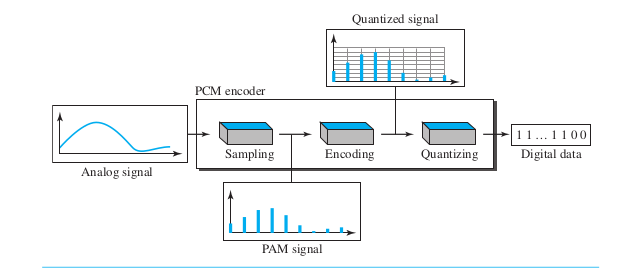

In [18]:
# necessary library 
import numpy as np
import matplotlib.pyplot as plt

**Defining analog signal :**

---



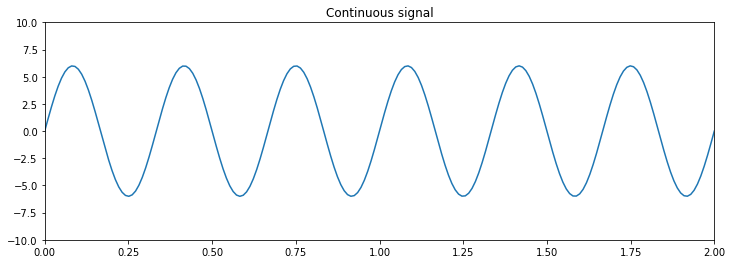

In [19]:
a = 6     #Amplitude
f = 3     #Frequency
T = 1/f   #Period

t = np.linspace(0,2.0,200)
x = a*np.sin(2.0*np.pi*f*t)
plt.figure(figsize=(12,4))
plt.title("Continuous signal")
plt.axis([0,2,-10,10])
plt.axis([0,2,-10,10])
plt.plot(t,x)
plt.show()


# **Sampling :**

 The first step in PCM is sampling. The analog signal is sampled every T s s, where T s is
the sample interval or period. The inverse of the sampling interval is called the sam-
pling rate or sampling frequency and denoted by f s, where f s = 1/T s .


**Sampling rate:**

According to the Nyquist theorem, the sampling rate must be
at least 2 times the highest frequency contained in the signal.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


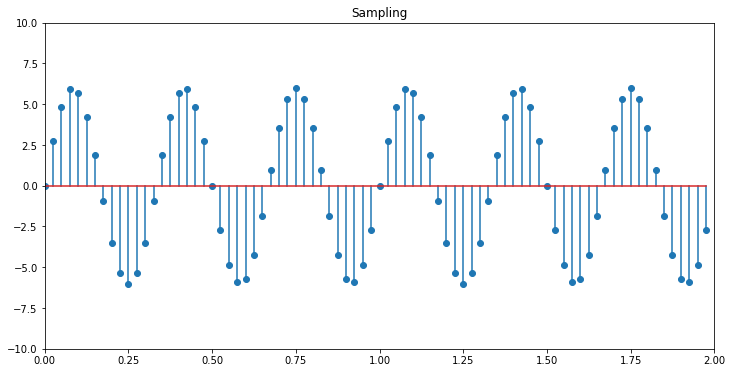

In [20]:
Fs = 40      #Sampling frequency
T =1.0/Fs     # Sampling interval

nT = np.arange(0, 2, T)
x_nT = a*np.sin(2.0*np.pi*f*nT)

plt.figure(figsize=(12,6))
plt.title("Sampling")
plt.axis([0,2,-10,10])
plt.stem(nT,x_nT)
plt.show()

# **Quantization :**
The result of sampling is a series of pulses with amplitude values between the maxi-
mum and minimum amplitudes of the signal. The set of amplitudes can be infinite with
nonintegral values between the two limits. These values cannot be used in the encoding
process. Quantization replaces each real number with an approximation from a finite set of discrete values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


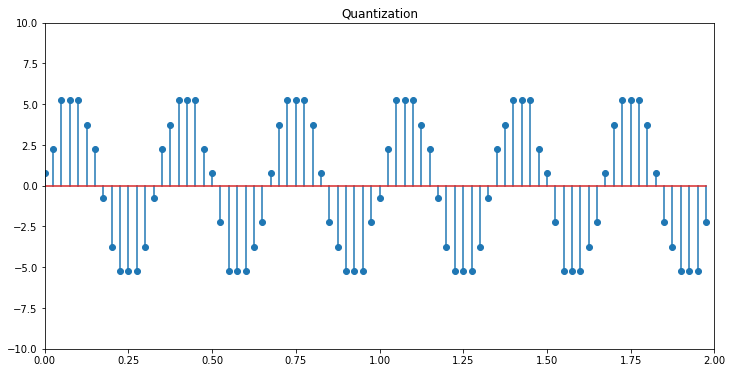

In [21]:
q_bit = 3                       #number of bit in quantizer
level = 2 ** q_bit               #Number of levels
vmax = a;
vmin = -vmax;
delta = (vmax-vmin)/level;
partition = np.arange(vmin, vmax, delta)

quantized_values = np.zeros(len(x_nT))
encoded_numbers = np.zeros(len(x_nT))

for i in range(len(x_nT)):

  for j in range(len(partition)):
    
    if j<level-1:
      if x_nT[i]>= partition[j] and x_nT[i] < partition[j+1] :
        quantized_values[i] = (partition[j]+partition[j+1])/2
        encoded_numbers[i]=j

    if(j == level-1 and partition[j] <= x_nT[i]):
      quantized_values[i] = partition[j]+delta/2
      encoded_numbers[i] = j

plt.figure(figsize=(12,6))
plt.title("Quantization")   
plt.stem(nT, quantized_values)
plt.axis([0,2,-10,10])
plt.show()

# **Encoding:**
The last step in PCM is encoding. After each sample is quantized and the number of
bits per sample is decided, each sample can be changed to an n_b -bit code word.
That the number of bits for each
sample is determined from the number of quantization levels. If the number of quanti-
zation levels is L, the number of bits is n_b = log2L.

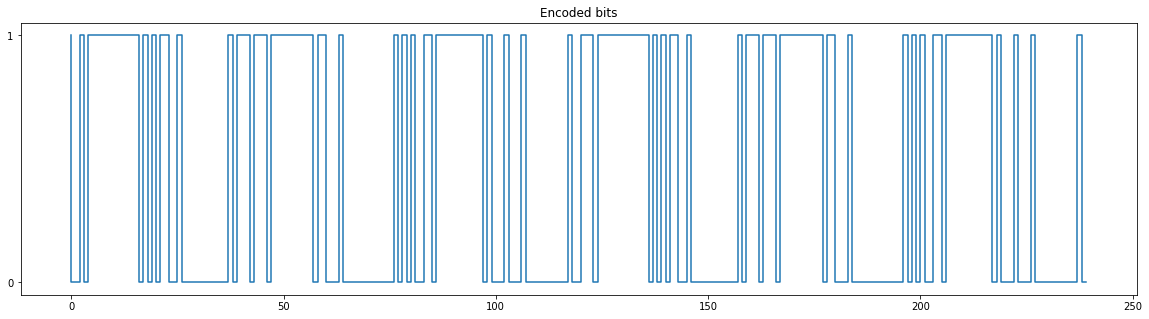

In [22]:
binary_stream = []
for i in range(len(encoded_numbers)):
  formatter = "{0:0"+"{0}".format(q_bit)+"b}"
  binary = formatter.format(int(encoded_numbers[i]))
  
  for j in range(len(binary)):
    binary_stream.append(binary[j])

bit_positions = np.arange(len(binary_stream))


plt.figure(figsize=(20, 5))
plt.title("Encoded bits")
plt.gca().invert_yaxis()
plt.step(bit_positions, binary_stream)
plt.show()